<a href="https://colab.research.google.com/github/riddlemeS4m/machine-learning-scientist-datacamp/blob/dev-google/module-3-unsupervised-learning/intrinsic_dimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 3: Unsupervised Learning in Python

In [ ]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn as skt

In [ ]:
# intrinsic dimension is the number of features needed to approximate the dataset
# ^^ that's the main idea behind dimension reduction

In [34]:
from sklearn.datasets import load_iris

In [52]:
data = load_iris()
samples = data['data']
targets = data['target']
feature_names = data['feature_names']
print(feature_names, samples[:5], targets[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] [0 0 0 0 0]


In [40]:
data = load_iris(as_frame=True)
df = data.frame
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [41]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [57]:
versicolor = df[df.target == 1]
versicolor = versicolor.drop(['target'], axis=1)
versicolor = versicolor.drop(['petal length (cm)'], axis=1)
versicolor.head()

,sepal length (cm),sepal width (cm),petal width (cm)
50,7.0,3.2,1.4
51,6.4,3.2,1.5
52,6.9,3.1,1.5
53,5.5,2.3,1.3
54,6.5,2.8,1.5


In [58]:
samples = versicolor.values
samples[:5]

array([[7. , 3.2, 1.4],
       [6.4, 3.2, 1.5],
       [6.9, 3.1, 1.5],
       [5.5, 2.3, 1.3],
       [6.5, 2.8, 1.5]])

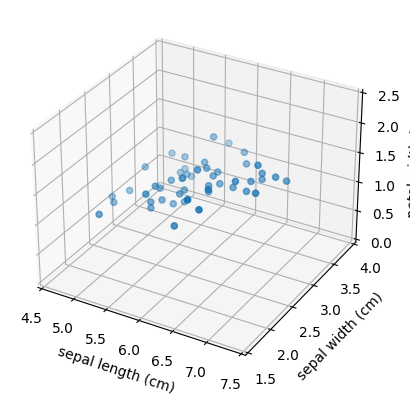

In [45]:
# prompt: Using dataframe versicolor: three dimensional plot showing 'sepal length (cm)', 'sepal width (cm)', and 'petal width (cm)'. x axis limits should be 4.5 to 7.5. y axis limits should be 1.5 to 4.0. z axis limits should be 0.0 to 2.5

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = versicolor['sepal length (cm)']
y = versicolor['sepal width (cm)']
z = versicolor['petal width (cm)']

ax.scatter(x, y, z)

ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal width (cm)')

ax.set_xlim(4.5, 7.5)
ax.set_ylim(1.5, 4.0)
ax.set_zlim(0.0, 2.5)

plt.show()


In [ ]:
# we can see that the data only really varies along two dimensions.
# so this data set only has intrinsic dimension two

In [46]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA()
pca.fit(samples)

PCA()

In [61]:
transformed = pca.transform(samples)
transformed[:5]

array([[-1.13236543,  0.09514055, -0.17654689],
       [-0.62150644, -0.20612416, -0.04140747],
       [-1.02792193,  0.10180149, -0.03853535],
       [ 0.57730811,  0.2048508 ,  0.19084939],
       [-0.55493859,  0.1726266 ,  0.10730898]])

In [62]:
transformed_x = transformed[:, 0]
transformed_y = transformed[:, 1]
transformed_z = transformed[:, 2]

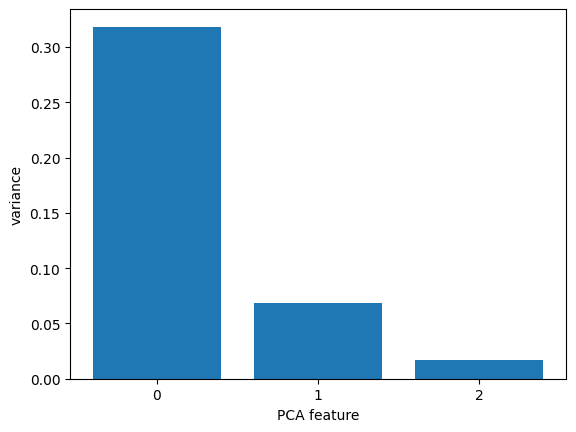

In [60]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

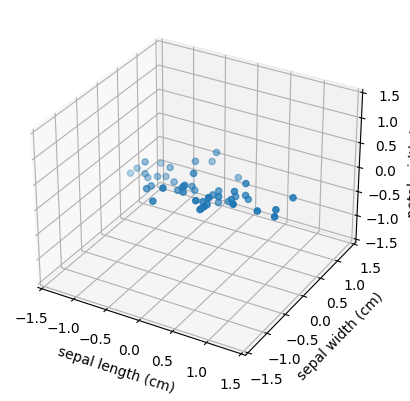

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = transformed_x
y = transformed_y
z = transformed_z

ax.scatter(x, y, z)

ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal width (cm)')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

plt.show()


In [ ]:
# intrinsic dimension is an idealization, there is not always one correct answer, just like kmeans
# you could argue for multiple important dimensions, just like kmeans you can argue for multiple clusters

Exercise

In [ ]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()